In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Classes\malaria_detection.csv")

In [2]:
df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria


In [3]:
df.isnull().sum()

filename    0
label       0
dtype: int64

# Encoding the labels

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])

In [5]:
df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,1
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,0
2,C59P20thinF_IMG_20150803_111333_cell_144.png,1
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,1
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,1


In [6]:
from skimage.io import imread,imshow
from skimage.transform import resize

# Creating train and test datasets

In [7]:
from sklearn.model_selection import train_test_split as tts
train_file,test_file,train_label,test_label=tts(df["filename"],df["label"],test_size=0.2,random_state=20)

In [8]:
train_file.shape,test_file.shape

((13503,), (5787,))

# Reading and showing a random image

In [9]:
import os
base_path=os.path.join(r"C:\Classes\cell_images")

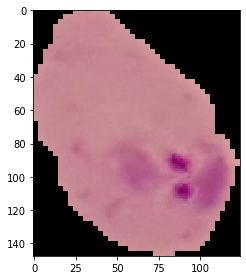

In [10]:
from random import randint
rm=randint(0,17361)
img=imread(os.path.join(base_path,train_file.iloc[rm]))
imshow(img)

# Creating hog features

In [11]:
from skimage.feature import hog
import numpy as np
from skimage.transform import resize
img_dim=(128,64)

In [13]:
train_features = []
for i in train_file:
    image = imread(os.path.join(base_path,i))
    image = resize(image,img_dim)
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    train_features.append(features)

In [14]:
test_features = []
for i in test_file:
    image = imread(os.path.join(base_path,i))
    image = resize(image,img_dim)
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    test_features.append(features)

In [15]:
train_features=np.array(train_features)
test_features=np.array(test_features)

# Model building

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(train_features,train_label)

lr.score(test_features,test_label)

C:\Users\samya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8171764299291515

## RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(train_features,train_label)

rf.score(test_features,test_label)

0.8170036288232244

## PassiveAggressiveClassifier

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
ps=PassiveAggressiveClassifier()

ps.fit(train_features,train_label)

ps.score(test_features,test_label)

0.7992051149127355

## DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(train_features,train_label)

dt.score(test_features,test_label)

0.6761707274926559

## XGBoost

In [22]:
from xgboost import XGBClassifier
xg=XGBClassifier()

xg.fit(train_features,train_label)

xg.score(test_features,test_label)

C:\Users\samya\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8398133748055988